**Import libraries**

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Employee data set import and display first 5 rows of dataset**

In [62]:
data=pd.read_csv("/content/Employee.csv")
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


**EXPLORATORY DATA ANALYSIS**

In [63]:
# Finding the number of rows and columns in dataset
data.shape

(74498, 24)

The data set contains 74498 rows and 24 colmns

In [64]:
#Finding the information  on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [65]:
# Display the column names of the dataset
for col in data.columns:
    print(col)

Employee ID
Age
Gender
Years at Company
Job Role
Monthly Income
Work-Life Balance
Job Satisfaction
Performance Rating
Number of Promotions
Overtime
Distance from Home
Education Level
Marital Status
Number of Dependents
Job Level
Company Size
Company Tenure
Remote Work
Leadership Opportunities
Innovation Opportunities
Company Reputation
Employee Recognition
Attrition


In [66]:
#Finding the number of each datatypes
data.dtypes.value_counts()

object     16
int64       6
float64     2
Name: count, dtype: int64

In [67]:
#unique values in Traget column "Attrition"
data['Attrition'].value_counts()

Attrition
Stayed    39128
Left      35370
Name: count, dtype: int64

From above w can infer that there are two values for attrition "Stayed" - means the emplyees stayed in the same company & "Left" - employee left company"

In [68]:
#Measures of Central Tendency of Dataset
data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [69]:
#Finding if the data set contains any null values in any columns
data.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

From the above we can infer that the data set contains null values is some columns

**Frequency Graph for each column in dataset**

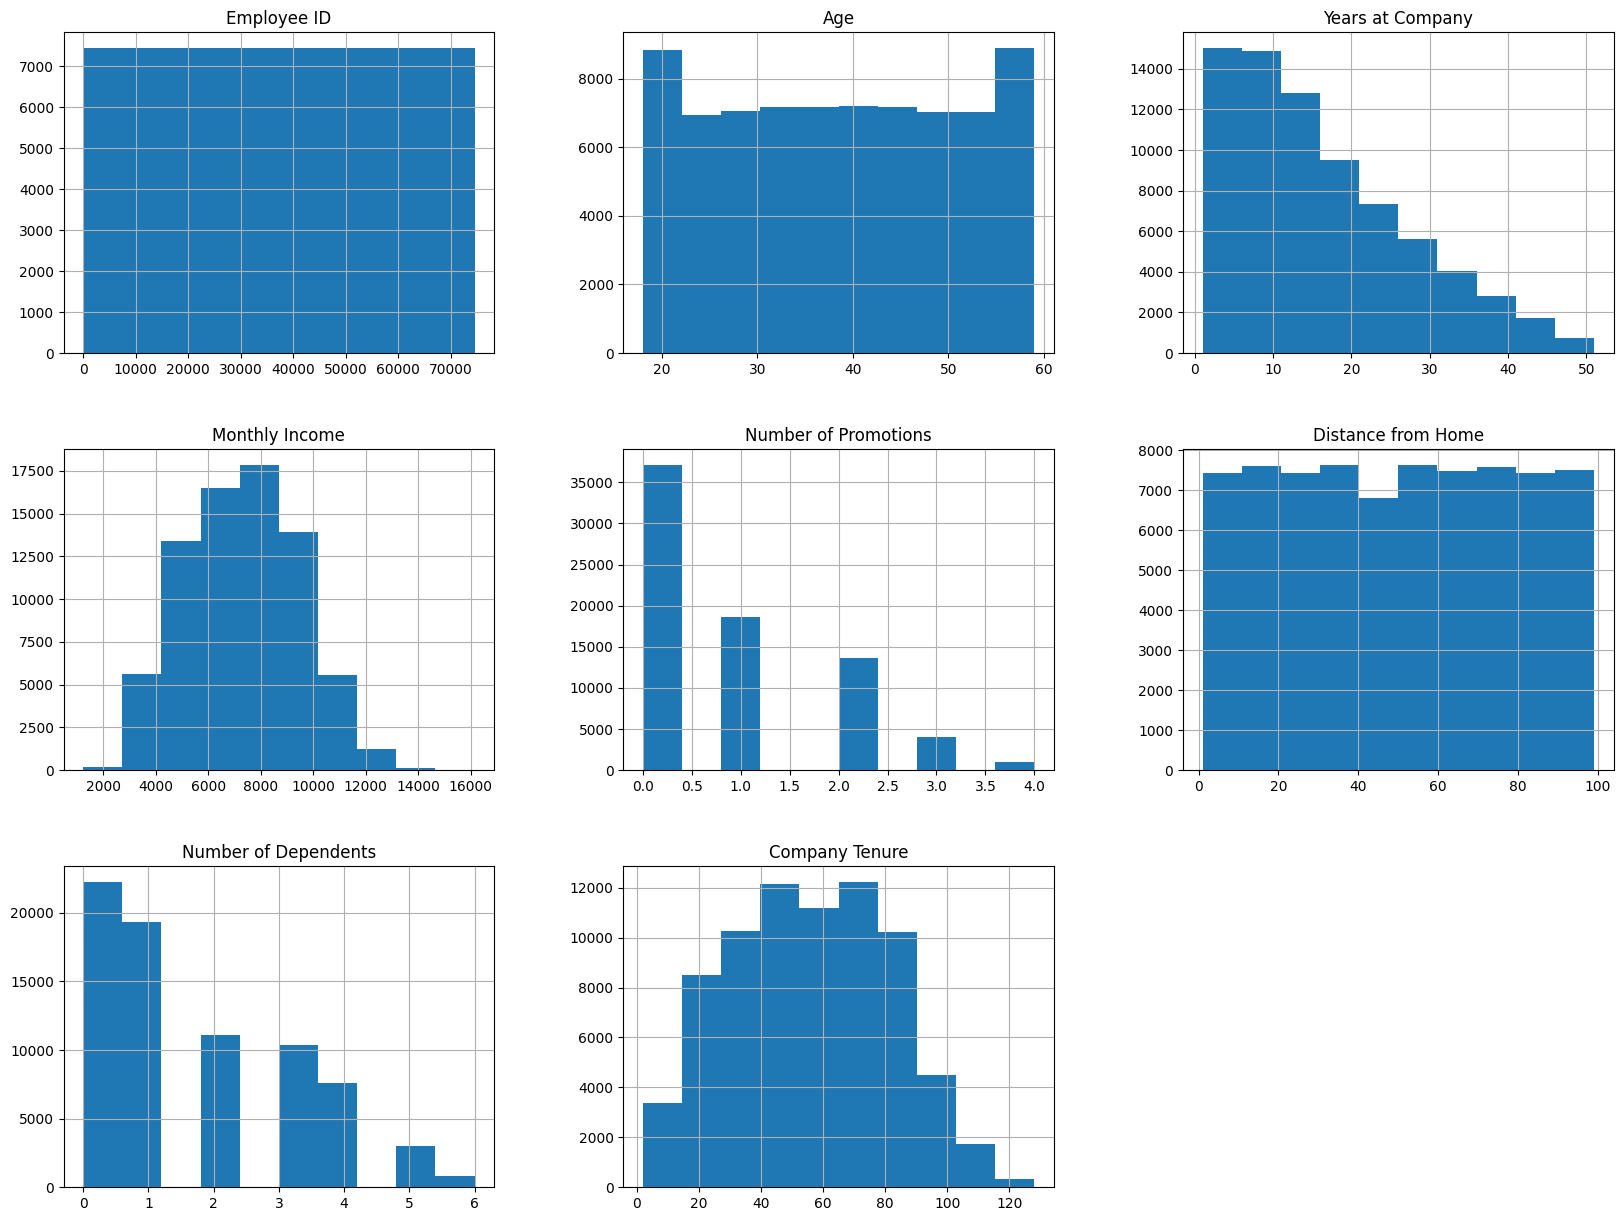

In [70]:
fre_graph=data.select_dtypes(include=["float64","int64"])
fre_graph.hist(figsize=(20,15));

From the graph above it can be infered that "Company tenure" and "Monthy income" is more likley to be symmetrical distributin. "Years at company" is skewed it means less number for emplyess work for long time in that company.

**Missing Values Handleling**

In [71]:
#Handliing missing values in "Number of promotions" & "Number of Dependents" using median values
data["Number of Promotions"]=data["Number of Promotions"].fillna(data["Number of Promotions"].median())
data["Number of Dependents"]=data["Number of Dependents"].fillna(data["Number of Dependents"].median())

**ENCODING**

In [72]:
#Import labelencorder
from sklearn.preprocessing  import LabelEncoder
le=LabelEncoder()  #create a instance

#Label encoding to all the object datatype coumns
data['Work-Life Balance']=le.fit_transform(data['Work-Life Balance'])
data['Performance Rating']=le.fit_transform(data['Performance Rating'])
data['Education Level']=le.fit_transform(data['Education Level'])
data['Performance Rating']=le.fit_transform(data['Performance Rating'])
data['Marital Status']=le.fit_transform(data['Marital Status'])
data['Job Level']=le.fit_transform(data['Job Level'])
data['Company Size']=le.fit_transform(data['Company Size'])
data['Remote Work']=le.fit_transform(data['Remote Work'])
data['Employee Recognition']=le.fit_transform(data['Employee Recognition'])
data['Gender']=le.fit_transform(data['Gender'])
data['Job Role']=le.fit_transform(data['Job Role'])
data['Job Satisfaction']=le.fit_transform(data['Job Satisfaction'])
data['Overtime']=le.fit_transform(data['Overtime'])
data['Leadership Opportunities']=le.fit_transform(data['Leadership Opportunities'])
data['Innovation Opportunities']=le.fit_transform(data['Innovation Opportunities'])
data['Company Reputation']=le.fit_transform(data['Company Reputation'])
data['Attrition']=le.fit_transform(data['Attrition'])

In [73]:
data.head()
data.shape

(74498, 24)

**DATA CLEANING**

In [74]:
#Drop the "Employee ID" column as it is irrelevant for the model creation
data=data.drop(['Employee ID'],axis=1)


OUTLIERS VISUALISATION & HANDLING

<ipython-input-78-e32a1442ff53>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


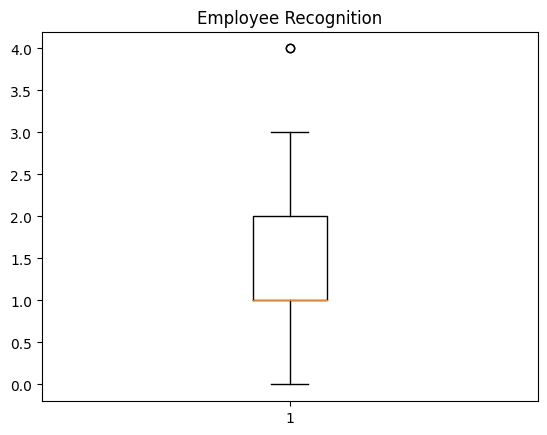

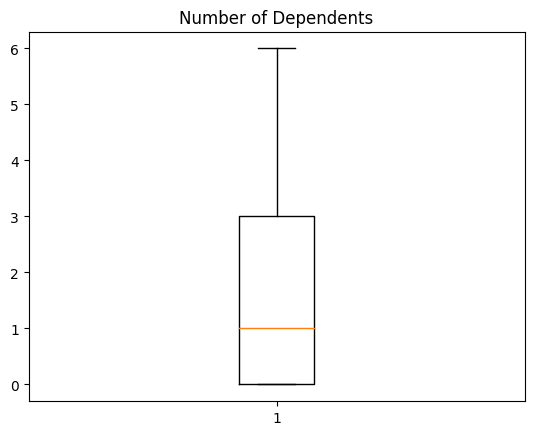

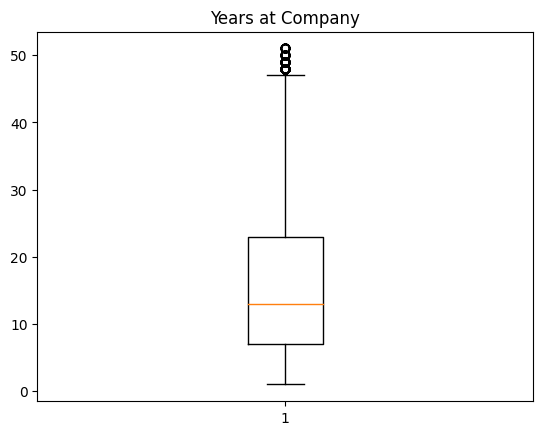

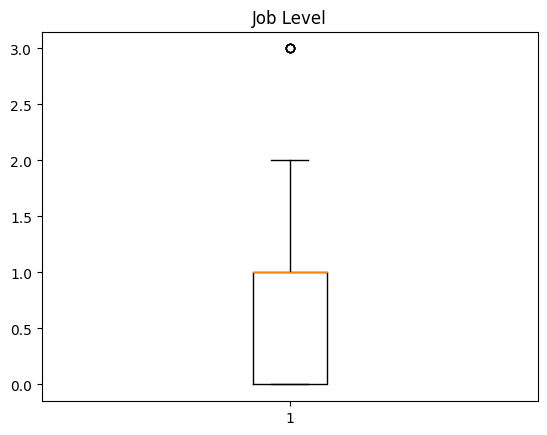

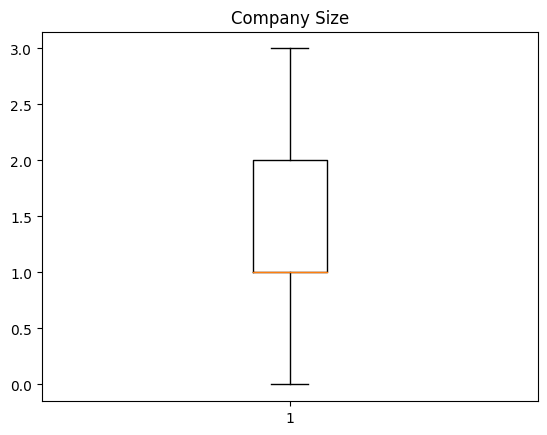

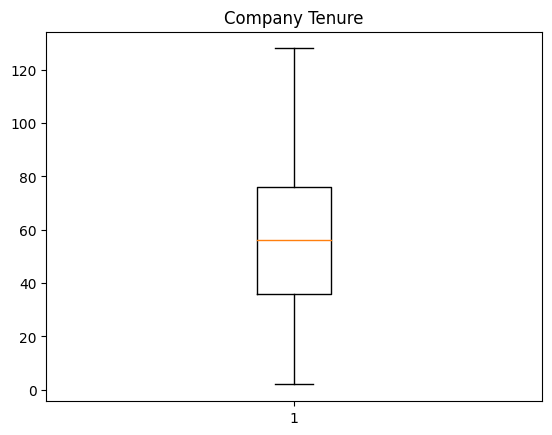

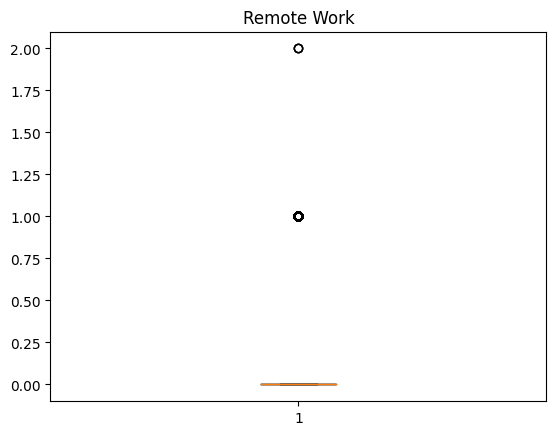

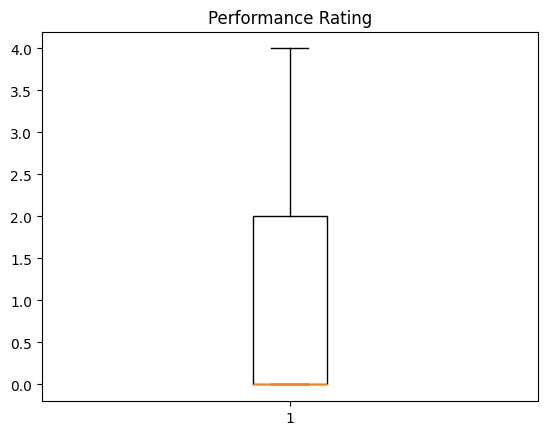

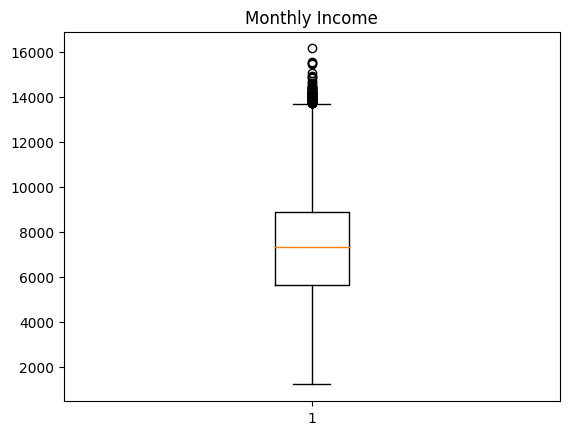

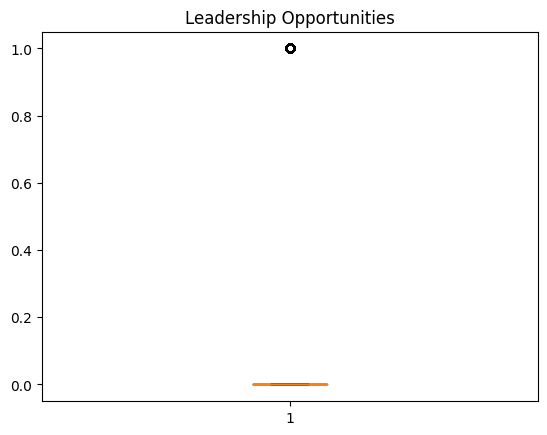

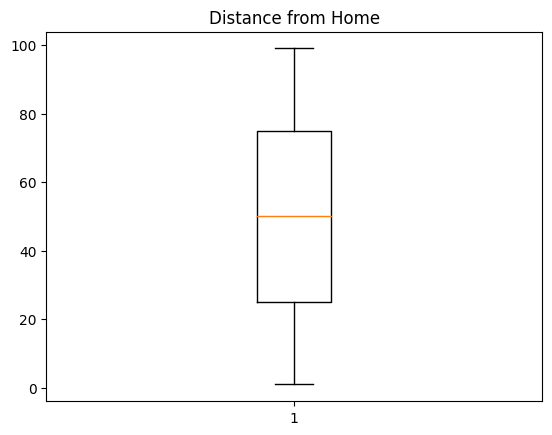

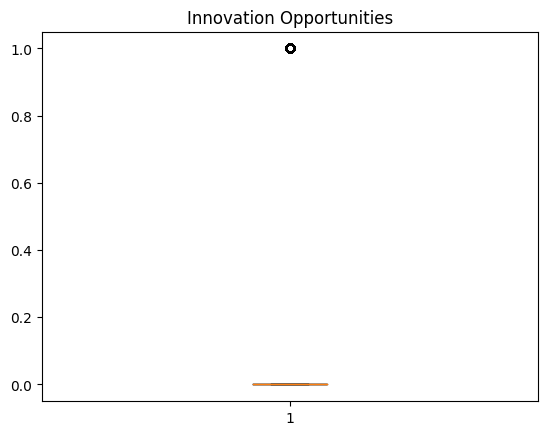

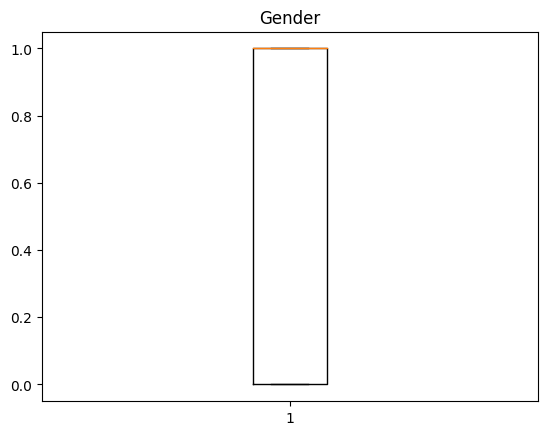

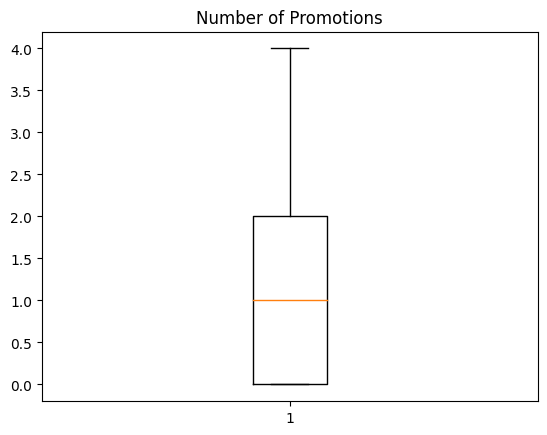

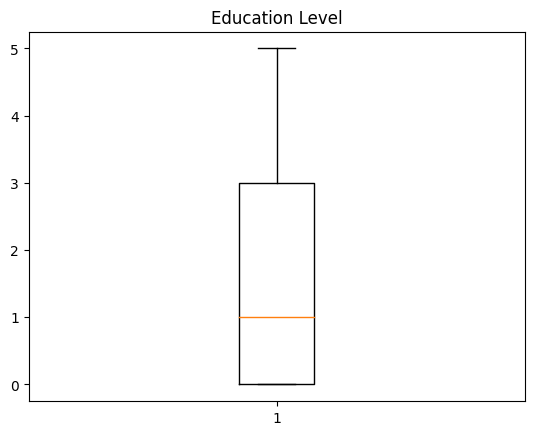

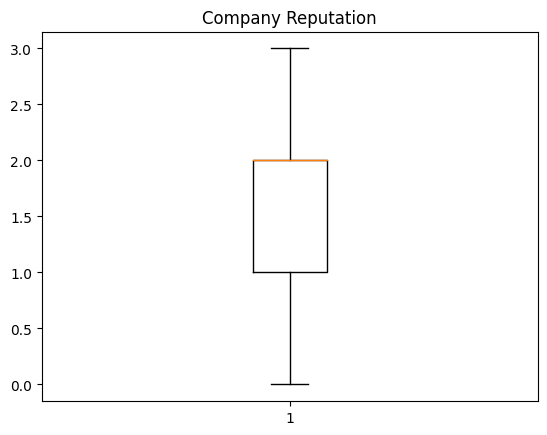

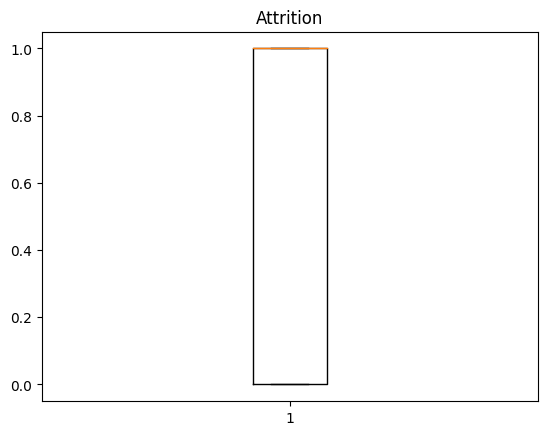

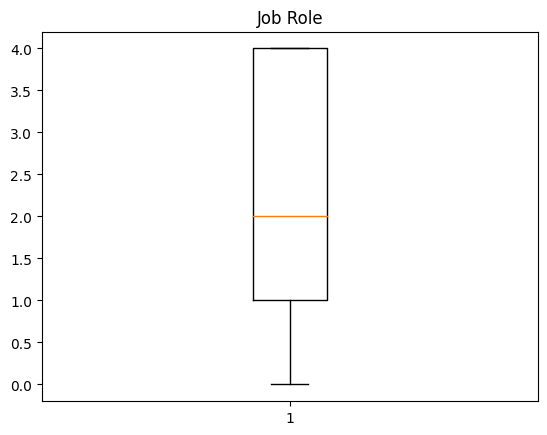

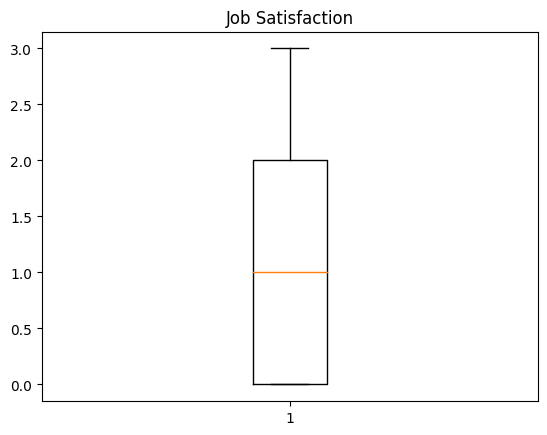

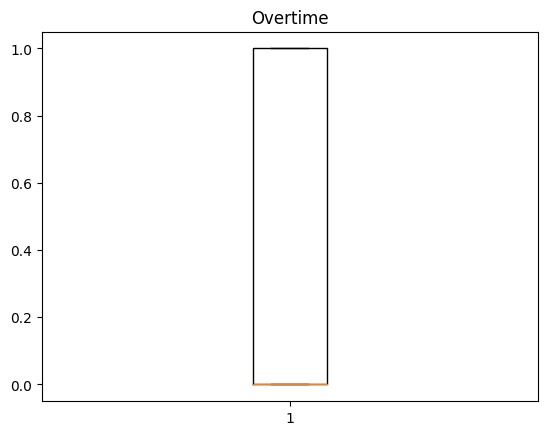

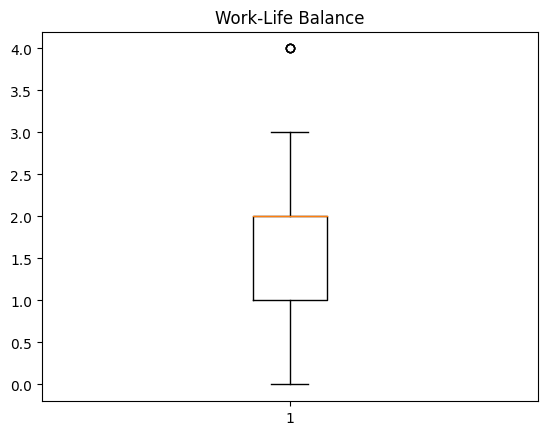

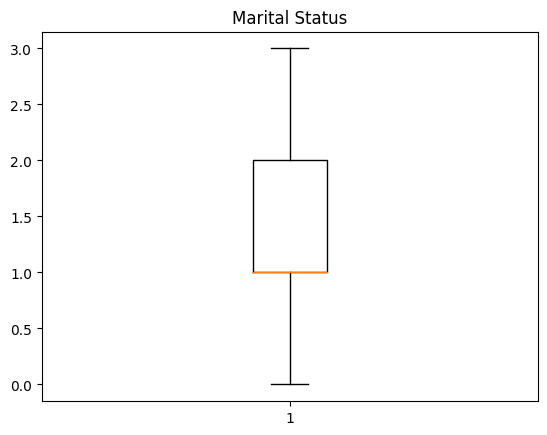

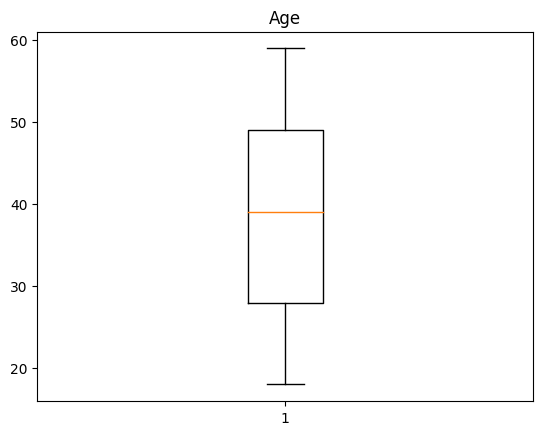

In [78]:
col={"Age",'Gender','Years at Company', 'Job Role', 'Monthly Income', 'Work-Life Balance', 'Job Satisfaction','Performance Rating','Number of Promotions','Overtime','Distance from Home','Education Level','Marital Status','Number of Dependents','Job Level','Company Size','Company Tenure','Remote Work','Leadership Opportunities','Innovation Opportunities','Company Reputation','Employee Recognition',
'Attrition'}
for i in col:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

From the above boxplot we can arrive at inference that "Employee reconition"," number of years","Monthly income","Work life balance"," Innovation oppertunities " are the varibales that have outliers. Of which Monthly income have comparitively more outliers


In [100]:
#Outlier handling using IQR method  for "Years at Company"
q1=np.percentile(data['Years at Company'],25,method='midpoint')
q3=np.percentile(data['Years at Company'],75,method='midpoint')

In [101]:
print("q1 is : " ,q1)
print("q3 is : " ,q3)

q1 is :  7.0
q3 is :  23.0


In [102]:
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR

In [95]:
outliers=[]
for x in data['Years at Company']:
  if(x<low_lim)or(x>up_lim):
    outliers.append(x)
print(outliers)  # Display the outliers

data['Years at Company']=data['Years at Company'].clip(lower=low_lim,upper=up_lim)  #clipping the outliers
outliers=[]
for x in data['Years at Company']:
  if(x<low_lim)or(x>up_lim):
    outliers.append(x)
print(outliers) #after clipping No outliers

[]
[]


In [103]:
#Outlier handling using IQR method  for "Monthly Income "
q1=np.percentile(data['Monthly Income'],25,method='midpoint')
q3=np.percentile(data['Monthly Income'],75,method='midpoint')
print("q1 is : " ,q1)
print("q3 is : " ,q3)
IQR=q3-q1
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR

q1 is :  5652.0
q3 is :  8876.0


In [104]:
outliers=[]
for x in data['Monthly Income']:
  if(x<low_lim)or(x>up_lim):
    outliers.append(x)
print(outliers)  # Display the outliers

data['Monthly Income']=data['Monthly Income'].clip(lower=low_lim,upper=up_lim)  #clipping the outliers
outliers=[]
for x in data['Monthly Income']:
  if(x<low_lim)or(x>up_lim):
    outliers.append(x)
print(outliers) #after clipping No outliers

[]
[]


**CORRELATION**

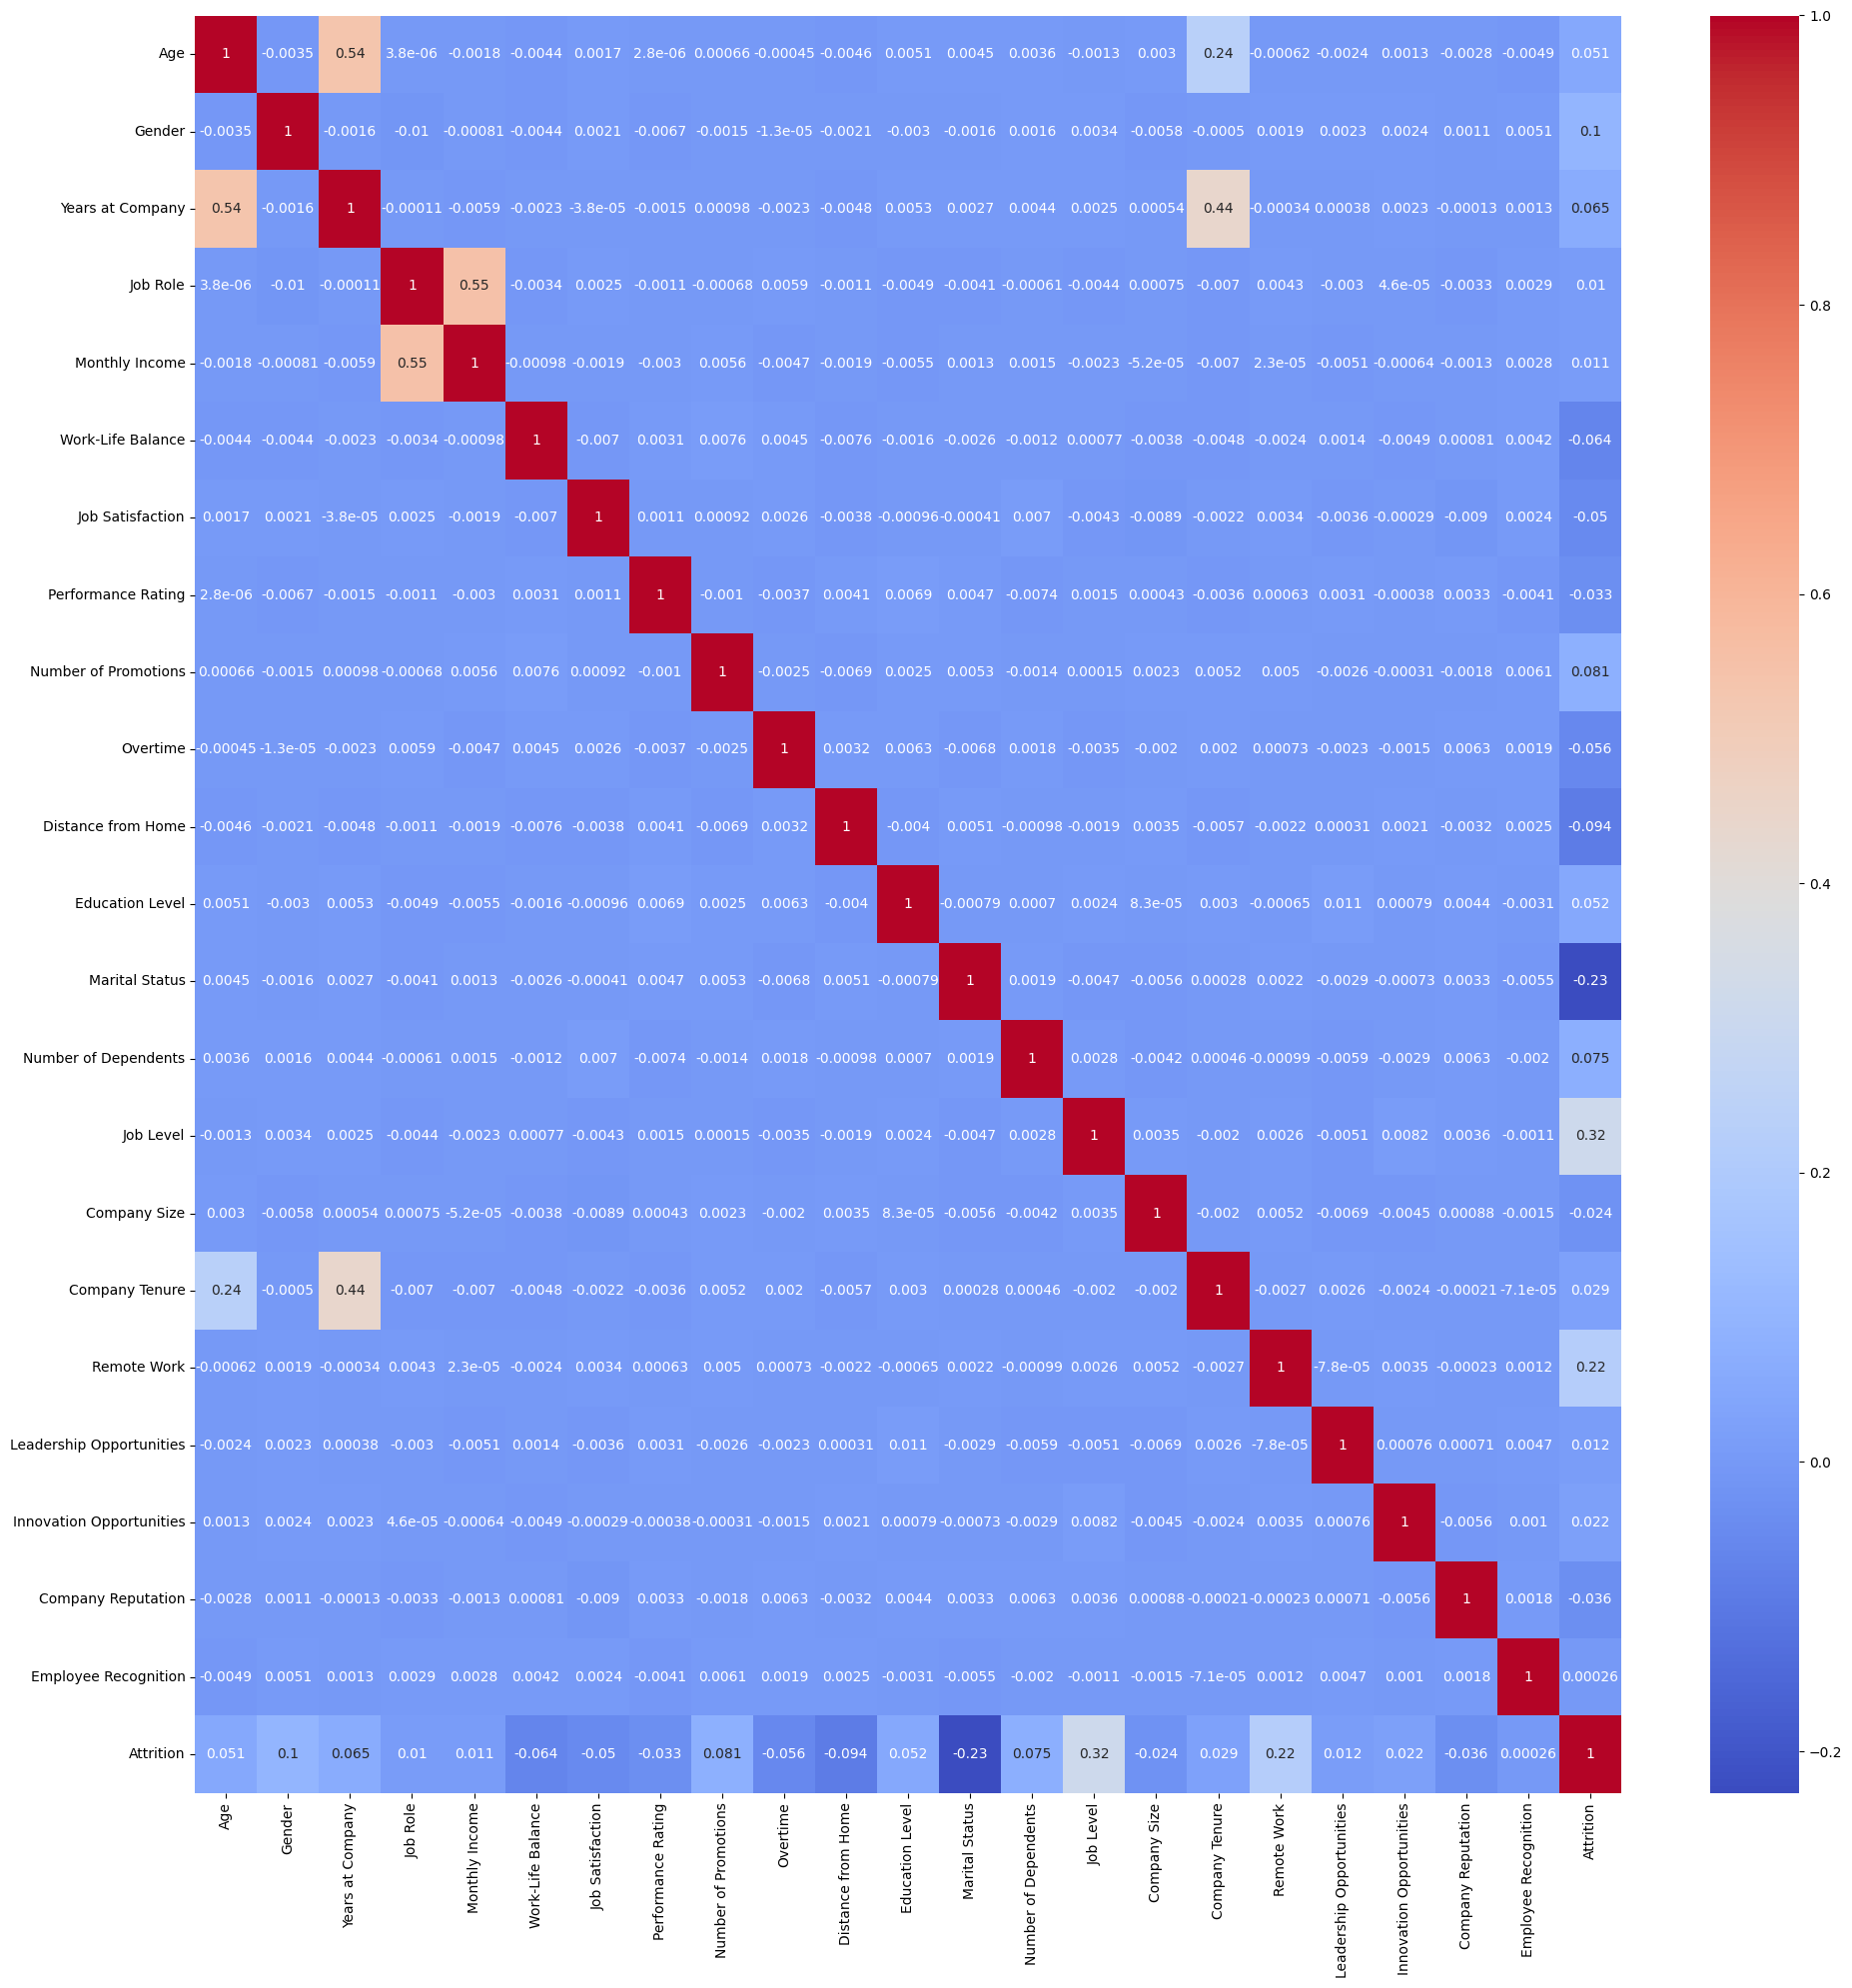

In [105]:
plt.figure(figsize=(20,20))
heatmap=sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.tight_layout()
plt.show()

From the correlation graph we can infer that no strong correltion is present between the variables


**DATA MODELLING**

The problem statement is a classification problem hence we can use classification algorithms to find the best model for the dataset

In [108]:
y=data['Attrition']
X=data.drop(['Attrition'],axis=1)   # create X with indepnedt varibales and y with traget varibales

Before modeling split the datset into test data and train data

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

**LOGISTIC REGRESSION**

In [112]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
log_pred=logreg.predict(X_test)
log_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, ..., 1, 0, 1])

In [113]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
confusion_matrix(y_test, log_pred)

array([[5727, 3144],
       [2623, 7131]])

In [114]:
print('Accuracy:', accuracy_score(y_test,log_pred))
print('Precision:', precision_score(y_test,log_pred))
print('recall:', recall_score(y_test,log_pred))
print('f1:', f1_score(y_test,log_pred))

Accuracy: 0.6903624161073826
Precision: 0.694014598540146
recall: 0.7310846832068895
f1: 0.7120675021219233


In [115]:
#SCALING
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_Xtrain=sc.fit_transform(X_train)
sc_Xtest = sc.fit_transform(X_test)

In [116]:
logreg.fit(sc_Xtrain,y_train)
log_pred=logreg.predict(sc_Xtest)

In [117]:
confusion_matrix(y_test, log_pred)

array([[6191, 2680],
       [2557, 7197]])

In [118]:
print('Accuracy:', accuracy_score(y_test,log_pred))
print('Precision:', precision_score(y_test,log_pred))
print('recall:', recall_score(y_test,log_pred))
print('f1:', f1_score(y_test,log_pred))

Accuracy: 0.7188187919463087
Precision: 0.7286625493570922
recall: 0.7378511379946688
f1: 0.7332280576638989


**DECISION TREE**

In [120]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred=dtree.predict(X_test)

In [121]:
confusion_matrix(y_test, y_pred)

array([[5761, 3110],
       [3138, 6616]])

In [122]:
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Precision:', precision_score(y_test,y_pred))
print('recall:', recall_score(y_test,y_pred))
print('f1:', f1_score(y_test,y_pred))

Accuracy: 0.6645369127516778
Precision: 0.6802385358831997
recall: 0.6782858314537625
f1: 0.6792607802874744


**RANDOM FOREST**

In [124]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [125]:
y_pred=rf_clf.predict(X_test)

In [126]:
confusion_matrix(y_test, y_pred)

array([[6521, 2350],
       [2319, 7435]])

In [127]:
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Precision:', precision_score(y_test,y_pred))
print('recall:', recall_score(y_test,y_pred))
print('f1:', f1_score(y_test,y_pred))

Accuracy: 0.7493154362416108
Precision: 0.7598364844149208
recall: 0.7622513840475702
f1: 0.7610420185270483


**RESULT**

From the above model we can say that Random Forest is a good model with accuracy 0.75 and precision 0.76